In [ ]:
%matplotlib inline

==========================
MS, 20190404

- Get 2D msftmz (AMOC) data, Calculate maximum of annual mean stream function with CDO

- Result: while numerical values are slightly different than in RTD, year-to-year variations are indistinguishable
- Result: reproduced plot that was made with 2_calc+plot_amoc_old.py (which calculated AMOC strength not with CDO but in python)
- 2_calc+plot_amoc_old2.py: changed order of calculation (maximum of monthly fields, then annual mean); this made a difference
                              and brought the results out of line of that in the RTD



In [1]:
basedir='/home/rms101/SCRIPTS/amoc_stab/'
import sys
sys.path.append(basedir + 'MODS')
import os
import glob
import nc as nc
import cmipdata as cd
import numpy as np
import matplotlib.pyplot as plt # for basic plotting
import rms_plots as rpl
import rms_utils as rut
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import matplotlib.gridspec as gridspec
################settings
#mpl.style.reload_library()
plt.style.use('rms_paper')
#basedir='/HOME/rms/SCRIPTS/6_OTHER/6PARIS-STAB/'
#rundir=basedir+'/8CanESM25/';os.chdir(rundir)

registering cmaps
registering cmaps


Read TAS data   

In [2]:
rundir='/home/rms101/SCRIPTS/amoc_stab/FIG5_ZECMIP/';os.chdir(rundir)
datadir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/amoc_stab_post/'
varnm='tas'
#####tas#####
###CanESM5###
years_his5=np.arange(1850,1911+1)-1850
years_20c5=np.arange(1911,2150+1)-1850
os.chdir(datadir+'DATA_tas_canesm5')
ens_his=rut.cd_mkensemble('gmam_*_esm-1pctCO2*',prefix='gmam_',mip='cmip6')
ens_20c=rut.cd_mkensemble('gmam_*_esm-1pct-brch-1000PgC*',prefix='gmam_',mip='cmip6')
tas_his5=cd.loadfiles(ens_his,'tas')['data']
tas_20c5=cd.loadfiles(ens_20c,'tas')['data']

tas0=np.mean(tas_his5[:,0])
#tas0=np.mean(tas_his5[:,0:10])
tas_his5=tas_his5-tas0
tas_20c5=tas_20c5-tas0
tas_his5=tas_his5[:,0:61+1]

###ZECMIP###
os.chdir('{}/DATA_{}_ZECMIP'.format(datadir,varnm))  

##1pct##
ntmax=150
files_1pct=sorted(glob.glob('*1pctCO2*')); nmod=len(files_1pct)
tas_1pct=np.zeros((nmod,ntmax))*np.nan
modnames= []
for i in range(nmod):
    modnames.append(files_1pct[i].split('_')[3])
    tas_tmp=nc.getvar(files_1pct[i],'tas').squeeze()
    nt=len(tas_tmp)
    tas_1pct[i,0:nt]=tas_tmp
print modnames
##20c##
ntmax=300
files_20c=sorted(glob.glob('*1000PgC*')); nmod=len(files_20c)
tas_20c=np.zeros((nmod,ntmax))*np.nan
modnames= []
for i in range(nmod):
    tas_tmp=nc.getvar(files_20c[i],'tas').squeeze()
    nt=len(tas_tmp)
    tas_20c[i,0:nt]=tas_tmp



This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

['ACCESS-ESM1-5', 'CESM2', 'GISS-E2-1-G-CC', 'NorESM2-LM']


2. Read AMOC data 
#####################################################

In [3]:
varnm='msftmyz'
#####msftmyz#####
###CanESM5###
os.chdir(datadir+'DATA_msftmyz_canesm5')
ens_his=rut.cd_mkensemble('amoc_nh_am_*_esm-1pctCO2*',prefix='amoc_nh_am_',mip='cmip6')
ens_20c=rut.cd_mkensemble('amoc_nh_am_*_esm-1pct-brch-1000PgC*',prefix='amoc_nh_am_',mip='cmip6')

amoc_his5=cd.loadfiles(ens_his,'msftmz')['data']
amoc_20c5=cd.loadfiles(ens_20c,'msftmz')['data']
amoc_his5=amoc_his5[:,0:61+1]

###ZECMIP###
os.chdir('{}/DATA_{}_ZECMIP'.format(datadir,varnm))
##Read 1pct
ntmax=150
files_1pct=sorted(glob.glob('*1pctCO2*')); nmod=len(files_1pct)
amoc_1pct=np.zeros((nmod,ntmax))*np.nan
modnames= []
for i in range(nmod):
    modnames.append(files_1pct[i].split('_')[4])
    msft=nc.getvar(files_1pct[i],'msftmz').squeeze()
    lat=nc.getvar(files_1pct[i],'lat').squeeze()
    nt=msft.shape[0]
    amoc_tmp=np.max(np.max(msft[:,:,rut.find_nearest(lat,20)::],axis=2),axis=1)/1.025e9
    amoc_1pct[i,0:nt]=amoc_tmp
print modnames

##Read 20c
ntmax=300
files_20c=sorted(glob.glob('*1000PgC*')); nmod=len(files_20c)
amoc_20c=np.zeros((nmod,ntmax))*np.nan
for i in range(nmod):
    modnames.append(files_20c[i].split('_')[4])
    msft=nc.getvar(files_20c[i],'msftmz').squeeze()
    lat=nc.getvar(files_20c[i],'lat').squeeze()
    nt=msft.shape[0]
    amoc_tmp=np.max(np.max(msft[:,:,rut.find_nearest(lat,20)::],axis=2),axis=1)/1.025e9
    amoc_20c[i,0:nt]=amoc_tmp

os.chdir(rundir)


This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

['ACCESS-ESM1-5', 'CESM2', 'GISS-E2-1-G-CC', 'NorESM2-LM']


3. Plot 
#####################################################

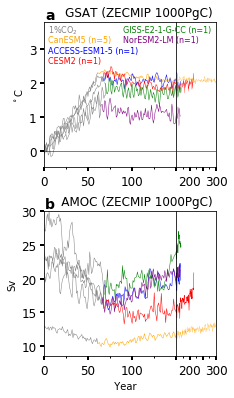

In [4]:
x1=0.02
x2=0.48
x3=0.53
x4=0.76
x5=x4+(150./500)*(x4-x3)
fig = plt.figure(constrained_layout=False,figsize=(8,8))

gs2 = gridspec.GridSpec(nrows=2, ncols=1, left=x3, right=x4,
                        wspace=0,hspace=0.3,bottom=0.3)
ax5 = fig.add_subplot(gs2[0])
ax7 = fig.add_subplot(gs2[1])

gs3 = gridspec.GridSpec(nrows=2, ncols=1, left=x4, right=x5,
                        wspace=0,hspace=0.3,bottom=0.3)
ax6 = fig.add_subplot(gs3[0])
ax8 = fig.add_subplot(gs3[1])

def set_xaxis1 (ax):
  ax.set_xlim([0, 150]) 
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 
  ax.set_xticklabels(('','0','50','100'))

def set_xaxis2 (ax):
  ax.set_xlim([150, 300]) 
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 
  ax.set_xticklabels(('','','200','','300'))

ntbreak=[66,66,68,65] #endpoint of 1pct in year-1 units
colors=['blue','red','green','purple']

#1-150############################################
ax=ax5
set_xaxis1(ax)

ax.set_ylim([-0.5, 3.8])
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_ylabel('$^\circ$C')

###Plot- year 1-150### 
##CanESM5
ax.plot(years_his5,np.mean(tas_his5,axis=0),'grey',linewidth=0.5)
ax.plot(years_20c5,np.mean(tas_20c5,axis=0),'orange',linewidth=0.5)
##Other ZECMIP models
for i in range(nmod):    
    years1=range(ntbreak[i]+2)
    tas1=tas_1pct[i,0:ntbreak[i]+2]-tas_1pct[i,0]
    ax.plot(years1,tas1,'grey',linewidth=0.5)
    years2=np.arange((ntbreak[i]+1),(ntbreak[i]+301))
    tas2=tas_20c[i,:]-tas_1pct[i,0]
    ax.plot(years2,tas2,colors[i],linewidth=0.5)
    if i==2:
        ax.plot([years1[-1],years2[0]],[tas1[-1],tas2[0]],color='gray',linewidth=0.5)    
##linesc##
ax.axhline(y=0,color="black",linewidth=0.5)

##legend1##
ax.text(5,3.5,'1%CO$_2$',color= 'gray',fontsize=8)
ax.text(5,3.2,'CanESM5 (n=5)',color= 'orange',fontsize=8)

for i in range(2):
    ax.text(5,3.5-(i+2)*0.3,modnames[i]+' (n=1)',color= colors[i],fontsize=8)

##title##
rpl.add_title(ax,'               GSAT (ZECMIP 1000PgC)','a')

##Plot- year 150-300###
ax=ax6
set_xaxis2(ax)
ax.set_ylim([-0.5, 3.8])
ax.set_yticklabels((''));ax.yaxis.set_tick_params(length=0,width=0)
ax.plot(years_20c5,np.mean(tas_20c5,axis=0),'orange',linewidth=0.25)
##Other ZECMIP models
for i in range(nmod):    
    years=np.arange((ntbreak[i]+1),(ntbreak[i]+301))
    tas=tas_20c[i,:]-tas_1pct[i,0]
    ax.plot(years,tas,colors[i],linewidth=0.25)

##legend2##
for i in range(2,nmod):
    ax.text(-50,3.5-(i-2)*0.3,modnames[i]+' (n=1)',color= colors[i],fontsize=8)

##linec##
ax.axhline(y=0,color="black",linewidth=0.5)


##ROW 2: AMOC############################################
#######################################################

ax=ax7
set_xaxis1(ax)
ax.set_ylim([8.5, 30])
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.set_ylabel('Sv')    
####Plot- year 1-150####
##CanESM5##
ax.plot(years_his5,np.mean(amoc_his5,axis=0),'grey',linewidth=0.5)
ax.plot(years_20c5,np.mean(amoc_20c5,axis=0),'orange',linewidth=0.5)
##Other ZECMIP models##
for i in range(nmod):    
    years1=range(ntbreak[i]+2)
    amoc1=amoc_1pct[i,0:ntbreak[i]+2]
    ax.plot(years1,amoc1,'gray',linewidth=0.5)
    years2=np.arange((ntbreak[i]+1),(ntbreak[i]+301))
    amoc2=amoc_20c[i,:]
    ax.plot(years2,amoc2,colors[i],linewidth=0.5)
    if i==2:
        ax.plot([years1[-1],years2[0]],[amoc1[-1],amoc2[0]],color='gray',linewidth=0.5)    


rpl.add_title(ax,'              AMOC (ZECMIP 1000PgC)','b')
ax.set_xlabel('          Year')

##Plot- year 150-300###
ax=ax8
set_xaxis2(ax)
ax.set_ylim([8.5, 30])
ax.set_yticklabels((''));ax.yaxis.set_tick_params(length=0,width=0)

##CanESM5##
ax.plot(years_his5,np.mean(amoc_his5,axis=0),'grey',linewidth=0.25)
ax.plot(years_20c5,np.mean(amoc_20c5,axis=0),'orange',linewidth=0.25)
##Other ZECMIP models##
for i in range(nmod):    
    years=np.arange((ntbreak[i]+1),(ntbreak[i]+301))
    amoc=amoc_20c[i,:]
    ax.plot(years,amoc,colors[i],linewidth=0.5)



#title############################################

#save############################################
rpl.mysavefig(fig,'PLOTS/fig5_old.png')

CanESM5 12.1
ACCESS-ESM1-5 19.6
CESM2 22.1
GISS-E2-1-G-CC 25.6
NorESM2-LM 21.9


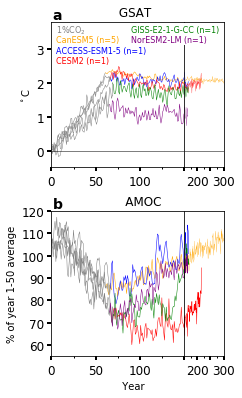

In [5]:
x1=0.02
x2=0.48
x3=0.53
x4=0.76
x5=x4+(150./500)*(x4-x3)
fig = plt.figure(constrained_layout=False,figsize=(8,8))

gs2 = gridspec.GridSpec(nrows=2, ncols=1, left=x3, right=x4,
                        wspace=0,hspace=0.3,bottom=0.3)
ax5 = fig.add_subplot(gs2[0])
ax7 = fig.add_subplot(gs2[1])

gs3 = gridspec.GridSpec(nrows=2, ncols=1, left=x4, right=x5,
                        wspace=0,hspace=0.3,bottom=0.3)
ax6 = fig.add_subplot(gs3[0])
ax8 = fig.add_subplot(gs3[1])



####### plot
def plot_x(ax,years,x,color,linewidth):
  kwargs={'linewidth': linewidth, 'color': color}
  ax.plot(years,np.mean(x,axis=0),**kwargs)                                    
  # range
  kwargs={'color':color, 'alpha': 0.15, 'linewidth': 0}
  ax.fill_between(years,np.min(x,axis=0), np.max(x,axis=0),**kwargs)
  #kwargs={'color':color, 'alpha': 0.25, 'linewidth': 0}
  #ax.fill_between(years,np.mean(x,axis=0)-np.std(x,axis=0), np.mean(x,axis=0)+np.std(x,axis=0),**kwargs)

def set_xaxis1 (ax):
  ax.set_xlim([0, 150]) 
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 
  ax.set_xticklabels(('','0','50','100'))

def set_xaxis2 (ax):
  ax.set_xlim([150, 300]) 
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 
  ax.set_xticklabels(('','','200','','300'))

ntbreak=[66,66,68,65] #endpoint of 1pct in year-1 units
colors=['blue','red','green','purple']

#1-150############################################
ax=ax5
set_xaxis1(ax)

ax.set_ylim([-0.5, 3.8])
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_ylabel('$^\circ$C')

###Plot- year 1-150### 
##CanESM5
ax.plot(years_his5,np.mean(tas_his5,axis=0),'grey',linewidth=0.5)
ax.plot(years_20c5,np.mean(tas_20c5,axis=0),'orange',linewidth=0.5)
##Other ZECMIP models
for i in range(nmod):    
    years1=range(ntbreak[i]+2)
    tas1=tas_1pct[i,0:ntbreak[i]+2]-tas_1pct[i,0]
    ax.plot(years1,tas1,'grey',linewidth=0.5)
    years2=np.arange((ntbreak[i]+1),(ntbreak[i]+301))
    tas2=tas_20c[i,:]-tas_1pct[i,0]
    ax.plot(years2,tas2,colors[i],linewidth=0.5)
    if i==2:
        ax.plot([years1[-1],years2[0]],[tas1[-1],tas2[0]],color='gray',linewidth=0.5)    
##linesc##
ax.axhline(y=0,color="black",linewidth=0.5)
##legend1##
ax.text(5,3.5,'1%CO$_2$',color= 'gray',fontsize=8)
ax.text(5,3.2,'CanESM5 (n=5)',color= 'orange',fontsize=8)

for i in range(2):
    ax.text(5,3.5-(i+2)*0.3,modnames[i]+' (n=1)',color= colors[i],fontsize=8)

##title##
rpl.add_title(ax,'         GSAT','a')

##Plot- year 150-300###
ax=ax6
set_xaxis2(ax)
ax.set_ylim([-0.5, 3.8])
ax.set_yticklabels((''));ax.yaxis.set_tick_params(length=0,width=0)
ax.plot(years_20c5,np.mean(tas_20c5,axis=0),'orange',linewidth=0.25)
##Other ZECMIP models
for i in range(nmod):    
    years=np.arange((ntbreak[i]+1),(ntbreak[i]+301))
    tas=tas_20c[i,:]-tas_1pct[i,0]
    ax.plot(years,tas,colors[i],linewidth=0.25)


##legend2##
ax.text(150,3.35,'*',color='white',backgroundcolor='white',fontsize=12)
for i in range(2,nmod):
    ax.text(-50,3.5-(i-2)*0.3,modnames[i]+' (n=1)',color= colors[i],fontsize=8)

##linec##
ax.axhline(y=0,color="black",linewidth=0.5)


##ROW 2: AMOC############################################
#######################################################

ax=ax7
set_xaxis1(ax)
ax.set_ylim([55, 120])
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.set_ylabel('% of year 1-50 average')    
####Plot- year 1-150####
##CanESM5##
amoc_his5_em=np.mean(amoc_his5,axis=0).squeeze()
amoc_20c5_em=np.mean(amoc_20c5,axis=0).squeeze()
ax.plot(years_his5,amoc_his5_em*100./np.mean(amoc_his5_em[0:50]),'grey',linewidth=0.5)
ax.plot(years_20c5,amoc_20c5_em*100./np.mean(amoc_his5_em[0:50]),'orange',linewidth=0.5)
##Other ZECMIP models##
for i in range(nmod):    
    years1=range(ntbreak[i]+2)
    amoc1=amoc_1pct[i,0:ntbreak[i]+2]*100./np.mean(amoc_1pct[i,0:50])
    ax.plot(years1,amoc1,'gray',linewidth=0.5)
    years2=np.arange((ntbreak[i]+1),(ntbreak[i]+301))
    amoc2=amoc_20c[i,:]*100./np.mean(amoc_1pct[i,0:50])
    ax.plot(years2,amoc2,colors[i],linewidth=0.5)
    if i==2:
        ax.plot([years1[-1],years2[0]],[amoc1[-1],amoc2[0]],color='gray',linewidth=0.5)    

rpl.add_title(ax,'              AMOC ','b')
ax.set_xlabel('          Year')

##Plot- year 150-300###
ax=ax8
set_xaxis2(ax)
ax.set_ylim([55, 120])
ax.set_yticklabels((''));ax.yaxis.set_tick_params(length=0,width=0)

##CanESM5##
amoc_his5_em=np.mean(amoc_his5,axis=0).squeeze()
amoc_20c5_em=np.mean(amoc_20c5,axis=0).squeeze()
ax.plot(years_his5,amoc_his5_em*100./np.mean(amoc_his5_em[0:50]),'grey',linewidth=0.25)
ax.plot(years_20c5,amoc_20c5_em*100./np.mean(amoc_his5_em[0:50]),'orange',linewidth=0.25)
print 'CanESM5',"%4.1f"%np.mean(amoc_his5_em[0:50])

##Other ZECMIP models##
for i in range(nmod):    
    years=np.arange((ntbreak[i]+1),(ntbreak[i]+301))
    amoc=amoc_20c[i,:]*100./np.mean(amoc_1pct[i,0:50])
    ax.plot(years,amoc,colors[i],linewidth=0.5)
    print modnames[i],"%4.1f"%np.mean(amoc_1pct[i,0:50])

#save############################################
rpl.mysavefig(fig,'PLOTS/fig5.png')
rpl.mysavefig(fig,'PLOTS/fig5.pdf')

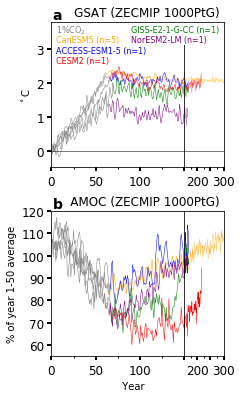